[https://www.kaggle.com/competitions/spaceship-titanic/rules]

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from tensorflow.keras import layers, models
from IPython.display import display, HTML


In [21]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
train["Cabin"].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [23]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='Transported'>

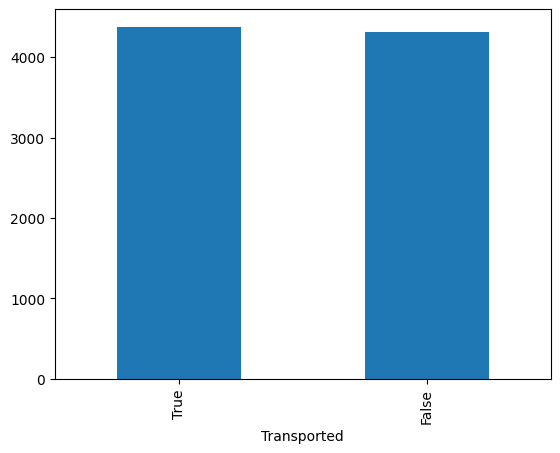

In [24]:
train["Transported"].value_counts().plot(kind="bar")

In [25]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

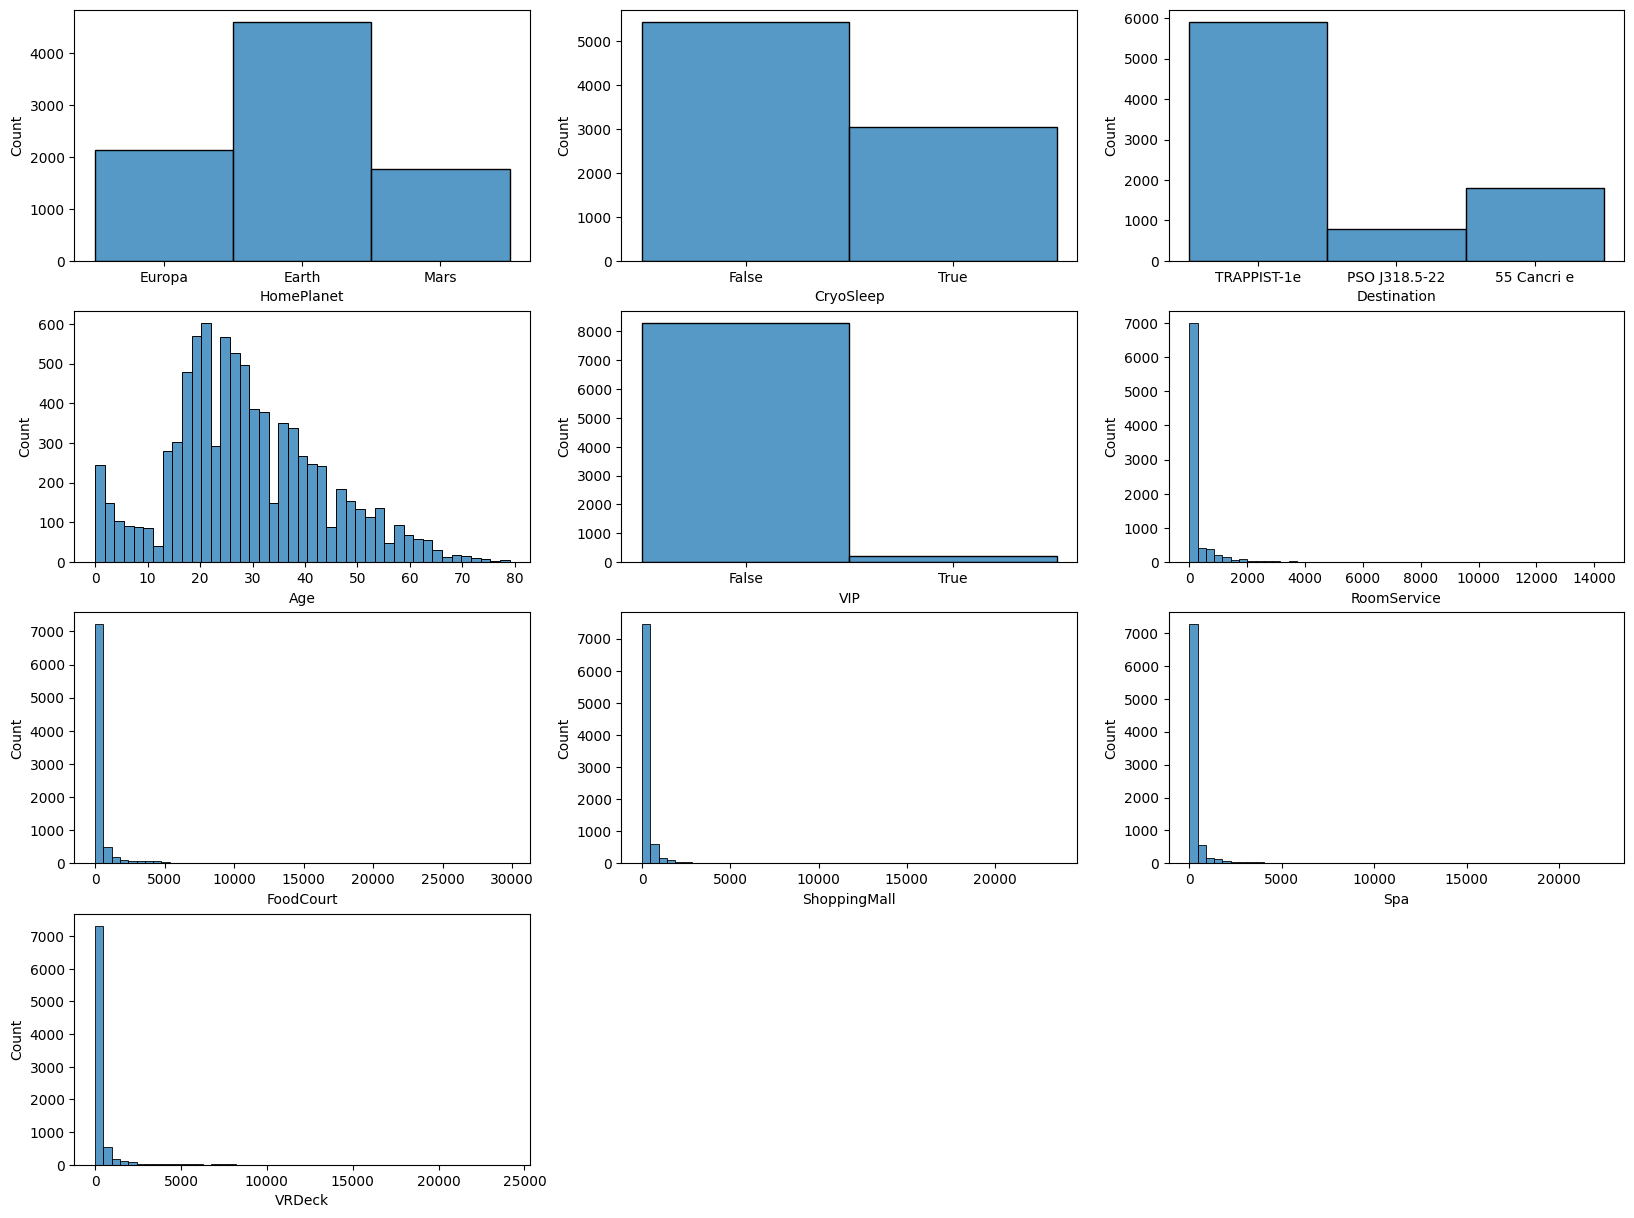

In [26]:
fig, ax = plt.subplots(4,3,figsize=(20,15))
ax = ax.flatten()

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['False', 'True'])

ax[4].set_xticks([0, 1])
ax[4].set_xticklabels(['False', 'True'])

sns.histplot(train["HomePlanet"],ax=ax[0])
sns.histplot(train["CryoSleep"],ax=ax[1], discrete=True)
sns.histplot(train["Destination"],ax=ax[2])
sns.histplot(train["Age"],ax=ax[3])
sns.histplot(train["VIP"],ax=ax[4], discrete=True)
sns.histplot(train["RoomService"],ax=ax[5], bins=50)
sns.histplot(train["FoodCourt"],ax=ax[6], bins=50)
sns.histplot(train["ShoppingMall"],ax=ax[7], bins=50)
sns.histplot(train["Spa"],ax=ax[8], bins=50)
sns.histplot(train["VRDeck"],ax=ax[9], bins=50)

for i in range(10, len(ax)):
    ax[i].axis("off")

plt.show()

In [27]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [28]:
# print(train["Cabin"][222])

In [29]:
def pre_processing(df):
    df = df.copy()
    df = df.drop(["PassengerId", "Name"], axis=1)
    df = df.dropna()
    df["CryoSleep"] = df["CryoSleep"].astype("int")
    df["VIP"] = df["VIP"].astype("int")
    df["Transported"] = df["Transported"].astype("int")
    df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
    df = df.drop(["Cabin"], axis=1)
    return df

def label_encode(df):
    df = df.copy()
    label_encoder = LabelEncoder()
    df["HomePlanet"] = label_encoder.fit_transform(df["HomePlanet"])
    df["Destination"] = label_encoder.fit_transform(df["Destination"])
    df["Deck"] = label_encoder.fit_transform(df["Deck"])
    df["Side"] = label_encoder.fit_transform(df["Side"])
    df["Cabin_num"] = df["Cabin_num"].astype("int")
    
    ss = StandardScaler()
    df = ss.fit_transform(df)
    return df

In [30]:
train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [31]:
train = pre_processing(train)

In [32]:
train.isna().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64

In [33]:
target = "Transported"
features = train.columns[train.columns != target]
x = train[features]
y = train[target]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

x_train = label_encode(x_train)
x_test = label_encode(x_test)

x_train = pd.DataFrame(x_train, columns=features)
x_test = pd.DataFrame(x_test, columns=features)

train_data = pd.concat([x_train, y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([x_test, y_test.reset_index(drop=True)], axis=1)

In [35]:
train_data = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label=target)
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label=target)

In [36]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])
rf.fit(train_data)

Use /tmp/tmpqxgeamsn as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.240927. Found 4734 examples.
Training model...


[INFO 23-12-22 15:32:33.7014 WET kernel.cc:1233] Loading model from path /tmp/tmpqxgeamsn/model/ with prefix 21654a94068841ef


Model trained in 0:00:00.837135
Compiling model...


[INFO 23-12-22 15:32:34.0596 WET decision_forest.cc:660] Model loaded with 300 root(s), 201260 node(s), and 13 input feature(s).
[INFO 23-12-22 15:32:34.0597 WET abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 23-12-22 15:32:34.0597 WET kernel.cc:1061] Use fast generic engine


Model compiled.


In [37]:
plot = tfdf.model_plotter.plot_model(rf, tree_idx=1, max_depth=3)

In [38]:
html_file_path = "tree_plot.html"

with open(html_file_path, "w") as html_file:
    html_file.write(plot)

print(f"Tree plot HTML saved to: {html_file_path}")

Tree plot HTML saved to: tree_plot.html


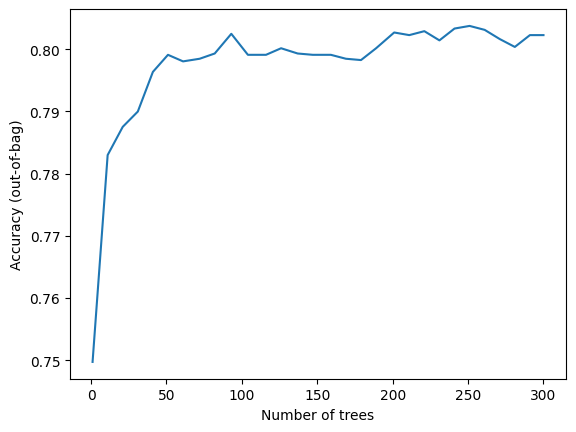

In [39]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [40]:
evaluation = rf.evaluate(x=test_data,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

3/3 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.8005
loss: 0.0000
accuracy: 0.8005


In [41]:
inspector = rf.make_inspector()
inspector.evaluation()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)
  
inspector.variable_importances()["NUM_AS_ROOT"]

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


[("CryoSleep" (1; #2), 112.0),
 ("RoomService" (1; #7), 62.0),
 ("Spa" (1; #10), 52.0),
 ("VRDeck" (1; #12), 40.0),
 ("ShoppingMall" (1; #8), 15.0),
 ("Deck" (1; #3), 8.0),
 ("FoodCourt" (1; #5), 8.0),
 ("HomePlanet" (1; #6), 3.0)]

In [42]:
tuner = tfdf.tuner.RandomSearch(num_trials=20)
tuner.choice("max_depth", [7, 10, 13]) 
tuner.choice("num_trees", [50, 200, 500])


gbt = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
gbt.compile(metrics=["accuracy"])
gbt.fit(train_data)

print(gbt.summary())

Use /tmp/tmpklaaprya as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.152457. Found 4734 examples.
Training model...


[WARNING 23-12-22 15:32:35.0896 WET gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-12-22 15:32:35.0900 WET gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-12-22 15:32:35.0900 WET gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Model trained in 0:00:00.927406
Compiling model...
Model compiled.
Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (13):
	Age
	Cabin_num
	CryoSleep
	Deck
	Destination
	FoodCourt
	HomePlanet
	RoomService
	ShoppingMall
	Side
	Spa
	VIP
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "CryoSleep"  0.228945 ################
    2.       "VRDeck"  0.217566 #############
    3.          "Spa"  0.214483 #############
    4.    "Cabin_num"  0.203413 ##########
    5.  "RoomService"  0.189726 ########
    6.    "FoodCourt"  0.188848 #######
    7.          "Age"  0.188315 #######
    8.         "Deck"  0.185826

[INFO 23-12-22 15:32:36.1668 WET kernel.cc:1233] Loading model from path /tmp/tmpklaaprya/model/ with prefix 29375fa8a38f44fb
[INFO 23-12-22 15:32:36.1740 WET quick_scorer_extended.cc:903] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 23-12-22 15:32:36.1744 WET kernel.cc:1061] Use fast generic engine


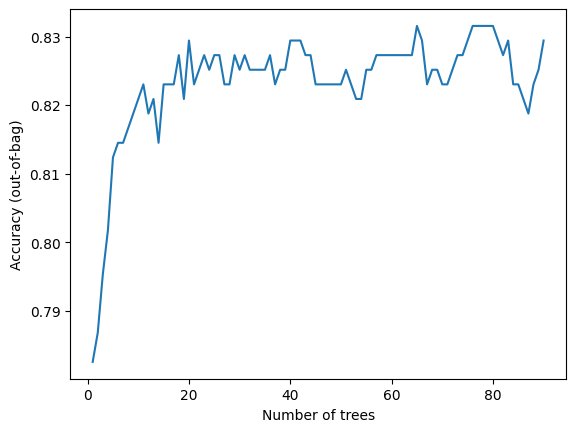

In [43]:
logs = gbt.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [44]:
evaluation = gbt.evaluate(x=test_data,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

3/3 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7970
loss: 0.0000
accuracy: 0.7970


In [45]:
inspector = gbt.make_inspector()
inspector.evaluation()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)
  
inspector.variable_importances()["NUM_AS_ROOT"]

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


[("CryoSleep" (1; #2), 22.0),
 ("VRDeck" (1; #12), 17.0),
 ("Spa" (1; #10), 13.0),
 ("Side" (1; #9), 5.0),
 ("Age" (1; #0), 3.0)]

In [46]:
print(x_train.columns)
x_train.head(5)

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Cabin_num',
       'Side'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
0,1.681125,-0.737926,-1.780831,-1.992470,-0.161269,-0.342366,-0.288836,-0.306915,-0.286336,-0.266662,0.403898,0.450707,0.977854
1,0.422276,1.355149,-1.780831,0.347176,-0.161269,-0.342366,-0.288836,-0.306915,-0.286336,-0.266662,-1.820715,-0.943473,0.977854
2,1.681125,-0.737926,0.638238,-0.753834,-0.161269,-0.334910,-0.274151,0.766106,-0.286336,0.663613,0.403898,-0.935651,-1.022648
3,-0.836574,1.355149,0.638238,0.484803,-0.161269,-0.342366,-0.288836,-0.306915,-0.286336,-0.266662,0.960052,-0.920008,0.977854
4,-0.836574,-0.737926,-0.571297,0.140737,-0.161269,-0.342366,0.221587,-0.306915,-0.286336,-0.266662,-0.152255,-1.119456,0.977854


In [47]:
# x_train = label_encode(x_train)
# x_test = label_encode(x_test)

In [48]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 0.5700 - accuracy: 0.6984 - val_loss: 0.4683 - val_accuracy: 0.7739
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7691 - val_loss: 0.4511 - val_accuracy: 0.7862
Epoch 3/10
148/148 [==============================] - 0s 992us/step - loss: 0.4596 - accuracy: 0.7822 - val_loss: 0.4424 - val_accuracy: 0.8020
Epoch 4/10
148/148 [==============================] - 0s 915us/step - loss: 0.4567 - accuracy: 0.7871 - val_loss: 0.4428 - val_accuracy: 0.8059
Epoch 5/10
148/148 [==============================] - 0s 970us/step - loss: 0.4520 - accuracy: 0.7886 - val_loss: 0.4392 - val_accuracy: 0.8030
Epoch 6/10
148/148 [==============================] - 0s 921us/step - loss: 0.4415 - accuracy: 0.7932 - val_loss: 0.4387 - val_accuracy: 0.8054
Epoch 7/10
148/148 [==============================] - 0s 948us/step - loss: 0.4389 - accuracy: 0.7983 - val_loss: 0.4347 - val_accuracy: 0.8

In [49]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
0,1.681125,-0.737926,-1.780831,-1.992470,-0.161269,-0.342366,-0.288836,-0.306915,-0.286336,-0.266662,0.403898,0.450707,0.977854
1,0.422276,1.355149,-1.780831,0.347176,-0.161269,-0.342366,-0.288836,-0.306915,-0.286336,-0.266662,-1.820715,-0.943473,0.977854
2,1.681125,-0.737926,0.638238,-0.753834,-0.161269,-0.334910,-0.274151,0.766106,-0.286336,0.663613,0.403898,-0.935651,-1.022648
3,-0.836574,1.355149,0.638238,0.484803,-0.161269,-0.342366,-0.288836,-0.306915,-0.286336,-0.266662,0.960052,-0.920008,0.977854
4,-0.836574,-0.737926,-0.571297,0.140737,-0.161269,-0.342366,0.221587,-0.306915,-0.286336,-0.266662,-0.152255,-1.119456,0.977854


   A  B
4  5  1
2  3  3
0  1  5
3  4  2
4    0
2    0
0    0
3    1
Name: Target, dtype: int64
